## Hypothesis 4 testing

### Do accidents increase during cold weather?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
hume_merged = pd.read_csv('cleaned_data/merged_hume_data.csv')
hume_merged.head()

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,Date,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,STAT_DIV_NAME,Rainfall amount (millimetres),Maximum temperature (Degree C)
0,T20140013978,Driving accident,Finished,2014/07/07,17:45:00,No,Struck Pedestrian,Monday,PED ON FOOTHPATH STRUCK BY VEHENTERING/LEAVING...,No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Local Road,Metro,0.2,15.3
1,T20140013706,Driving accident,Finished,2014/07/03,15:50:00,No,Collision with vehicle,Thursday,REAR END(VEHICLES IN SAME LANE),No,...,1.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Local Road,Metro,0.0,11.7
2,T20140014503,Driving accident,Finished,2014/07/14,13:27:00,No,Collision with vehicle,Monday,LANE CHANGE LEFT (NOT OVERTAKING),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.4,12.4
3,T20140014709,Driving accident,Finished,2014/07/16,13:30:00,No,No collision and no object struck,Wednesday,OUT OF CONTROL ON CARRIAGEWAY (ON STRAIGHT),No,...,1.0,0.0,RURAL_VICTORIA,RURAL_VICTORIA,HUME,METROPOLITAN NORTH WEST REGION,Local Road,Metro,0.4,13.8
4,T20140014809,Driving accident,Finished,2014/07/17,20:40:00,Yes,No collision and no object struck,Thursday,OFF CARRIAGEWAY TO LEFT,No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,11.7


In [3]:
#Remove accidents happened due to death of the driver before the accident
hume_merged = hume_merged[hume_merged['ABS_CODE']=='Driving accident']
hume_merged.shape

(2294, 54)

## Study accidents in both all roads and fast roads

### (a) Road accident frequency in all kinds of roads against daily max temperature

In [4]:
# Group data by the accident date to find daily values.
grouped_df = hume_merged.groupby(["Date"])

# Assign data to axis: x_axis is max temperature (mean used but all max temperature data values are the same for the same date),
# y_axis is daily accident count  
x_a = grouped_df["Maximum temperature (Degree C)"].mean()
y_a = grouped_df["ACCIDENT_NO"].count()

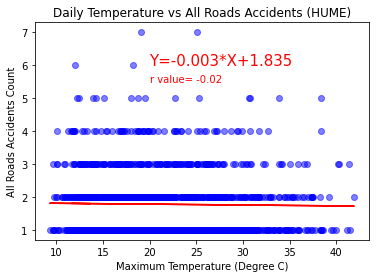

The pvalue of this correlation is 0.513 ---> We cannot reject null hypothesis


In [5]:
# Use matplotlib to create a scatter plot
plt.scatter(x_a, y_a, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.title("Daily Temperature vs All Roads Accidents (HUME)")
plt.xlabel("Maximum Temperature (Degree C)")
plt.ylabel("All Roads Accidents Count")

#Create regression line for the data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(x_a,y_a)
r_value = "r value= " + str(round((rvalue),2))
all_regress_values = x_a*slope+intercept
plt.plot(x_a,all_regress_values,color='r')
line_eq = 'Y='+str(round(slope,3))+'*X+'+str(round(intercept,3))
plt.annotate(line_eq,(20,6),fontsize=15,color='red')
plt.annotate(r_value,(20,5.5),fontsize=10,color="red")

plt.show()
print('The pvalue of this correlation is '+str(round(pvalue,3))+' ---> We cannot reject null hypothesis')

### (b) Fast roads accidents against daily max temperature

In [6]:
hume_merged['RMA'].unique()

array(['Local Road', 'Freeway', 'Arterial Other', 'Arterial Highway'],
      dtype=object)

In [7]:
#Separate data for accidents happened on freeways only
hume_fast = hume_merged[(hume_merged['RMA']=='Arterial Highway') | (hume_merged['RMA']=='Freeway')
                         | (hume_merged['RMA']=='Arterial Other')]
hume_fast

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,Date,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,STAT_DIV_NAME,Rainfall amount (millimetres),Maximum temperature (Degree C)
2,T20140014503,Driving accident,Finished,2014/07/14,13:27:00,No,Collision with vehicle,Monday,LANE CHANGE LEFT (NOT OVERTAKING),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.4,12.4
4,T20140014809,Driving accident,Finished,2014/07/17,20:40:00,Yes,No collision and no object struck,Thursday,OFF CARRIAGEWAY TO LEFT,No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,11.7
8,T20140015079,Driving accident,Finished,2014/07/22,09:15:00,No,Collision with vehicle,Tuesday,VEHICLE OFF FOOTPATH STRIKES VEH ON CARRIAGEWAY,No,...,0.0,0.0,SMALL_CITIES,SMALL_CITIES,HUME,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,10.1
10,T20140015349,Driving accident,Finished,2014/07/25,17:00:00,Yes,Collision with vehicle,Friday,RIGHT THROUGH,No,...,0.0,0.0,RURAL_VICTORIA,RURAL_VICTORIA,HUME,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,15.9
11,T20140015197,Driving accident,Finished,2014/07/23,17:14:00,No,Collision with vehicle,Wednesday,HEAD ON (NOT OVERTAKING),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.0,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,T20180022717,Driving accident,Finished,2018/11/28,12:45:00,No,Collision with vehicle,Wednesday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,20.9
2294,T20190001098,Driving accident,Finished,2019/01/19,07:40:00,No,Collision with a fixed object,Friday,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,2.4,24.0
2295,T20190006066,Driving accident,Finished,2019/03/31,13:50:00,No,Collision with a fixed object,Sunday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,1.8,20.0
2296,T20190009744,Driving accident,Finished,2019/05/24,09:06:00,No,Collision with vehicle,Friday,RIGHT FAR (INTERSECTIONS ONLY),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,18.8


In [8]:
# Group data by the accident date to find daily values.
grouped_fast = hume_fast.groupby(["Date"])

# Assign data to axis: x_axis is max temperature (mean used but all max temperature data values are the same for the same date),
# y_axis is daily accident count  
x_f = grouped_fast["Maximum temperature (Degree C)"].mean()
y_f = grouped_fast["ACCIDENT_NO"].count()

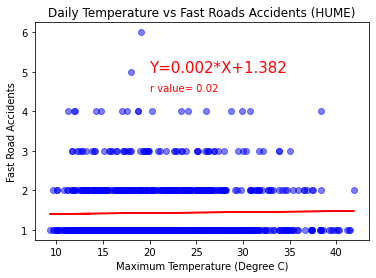

The pvalue of this correlation is 0.507 ---> We cannot reject null hypothesis


In [9]:
# Use matplotlib to create a scatter plot
plt.scatter(x_f, y_f, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.title("Daily Temperature vs Fast Roads Accidents (HUME)")
plt.xlabel("Maximum Temperature (Degree C)")
plt.ylabel("Fast Road Accidents")

#Create regression line for the data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(x_f,y_f)
r_value = "r value= " + str(round((rvalue),2))
fast_regress_values = x_f*slope+intercept
plt.plot(x_f,fast_regress_values,color='r')
line_eq = 'Y='+str(round(slope,3))+'*X+'+str(round(intercept,3))
plt.annotate(line_eq,(20,5),fontsize=15,color='red')
plt.annotate(r_value,(20,4.5),fontsize=10,color="red")

plt.show()
print('The pvalue of this correlation is '+str(round(pvalue,3))+' ---> We cannot reject null hypothesis')
